## Exercises - Basic SQL Queries

For these exercises, ensure the retail database is set up properly and undo any changes from the lecture.

* Create Tables using the script provided. You can either use SQLCMD or SSMS.

* You can drop the existing tables and recreate them if you made changes.

```sql
DROP TABLE order_items;
DROP TABLE orders;
DROP TABLE customers;
DROP TABLE products;
DROP TABLE categories;
DROP TABLE departments;
```

Use the file `/data/retail_db/create_db_tables_mssql.sql` to create the database and corresponding tables. 
Use `/data/retail_db/load_db_tables_mssql.sql` to load data into the tables


* Run queries to validate we have data in all the 3 tables.

### Exercise 1 - Customer order count

Get order count per customer for the month of 2014 January.
* Tables - orders and customers
* Data should be sorted in descending order by count and ascending order by customer id.
* Output should contain customer_id, customer_first_name, customer_last_name and customer_order_count.

<br />

Code:
```sql
SELECT
	c.customer_id,
	c.customer_fname,
	c.customer_lname,
	COUNT(o.order_id) as order_count
FROM
	customers c
JOIN
	orders o ON c.customer_id = o.order_customer_id
WHERE
	YEAR(o.order_date) = 2014
	AND MONTH(o.order_date) = 1
GROUP BY
	c.customer_id,
	c.customer_fname,
	c.customer_lname
ORDER BY
	order_count DESC,
	customer_id ASC;
```
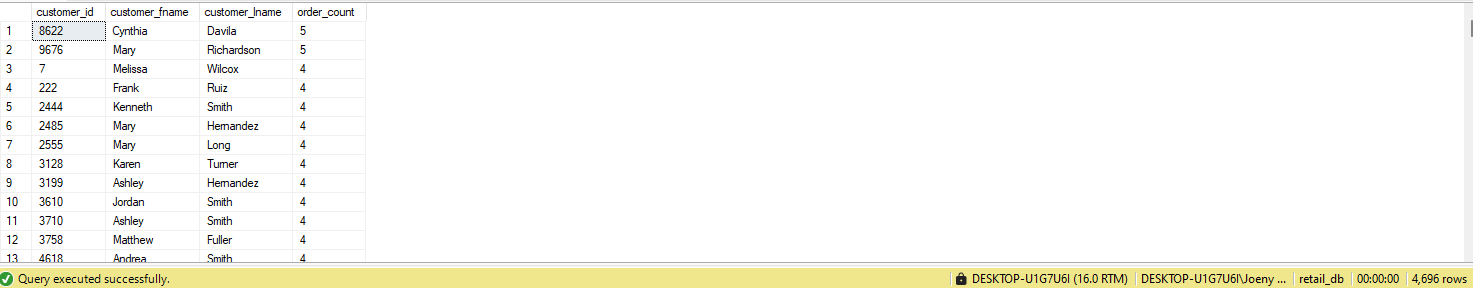


### Exercise 2 - Dormant Customers

Get the customer details who have not placed any order for the month of 2014 January.
* Tables - orders and customers
* Data should be sorted in ascending order by customer_id
* Output should contain all the fields from customers

<br />

Code:
```sql
SELECT
    c.*
FROM
    customers c
LEFT JOIN
    orders o ON c.customer_id = o.order_customer_id
    AND YEAR(o.order_date) = 2014
    AND MONTH(o.order_date) = 1
WHERE
    o.order_id IS NULL;
```
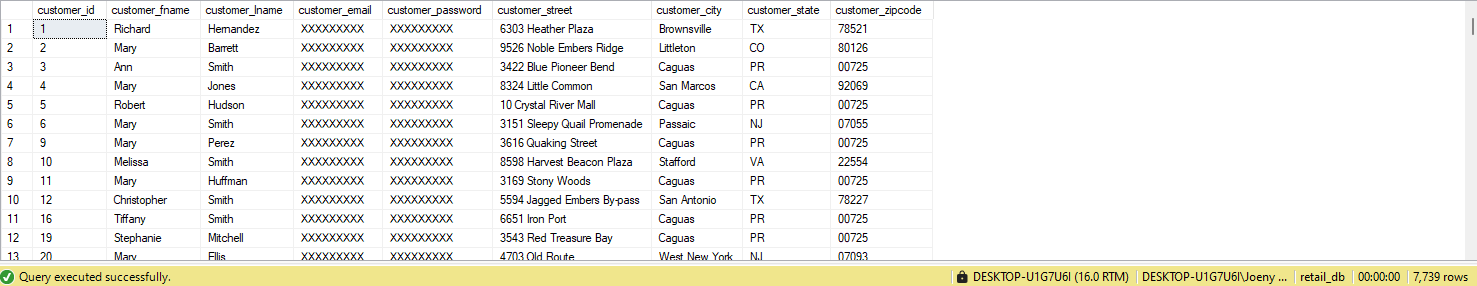


Number of rows in exercise 1 and 2 add up to 12,435 which is the total number of customers which is what we were expecting.

### Exercise 3 - Revenue Per Customer

Get the revenue generated by each customer for the month of 2014 January
* Tables - orders, order_items and customers
* Data should be sorted in descending order by revenue and then ascending order by customer_id
* Output should contain customer_id, customer_first_name, customer_last_name, customer_revenue.
* If there are no orders placed by customer, then the corresponding revenue for a give customer should be 0.
* Consider only COMPLETE and CLOSED orders

<br />

Code:
```sql
SELECT
	c.customer_id,
	c.customer_fname AS [First Name],
	c.customer_lname AS [Last Name] ,
    COALESCE(SUM(order_revenue.order_item_subtotal), 0) AS [Customer Revenue]
FROM
    customers c
LEFT JOIN
    (SELECT
        o.order_customer_id,
        oi.order_item_subtotal
     FROM
        orders o
     INNER JOIN
        order_items oi ON o.order_id = oi.order_item_order_id
     WHERE
		format(o.order_date, 'yyyy-MM') = '2014-01'
		AND (order_status LIKE '%COMPLETE%' OR order_status LIKE '%CLOSED%')
    ) AS order_revenue ON c.customer_id = order_revenue.order_customer_id
GROUP BY
    c.customer_id, 	
	c.customer_fname,
	c.customer_lname
ORDER BY
    [Customer Revenue] DESC,
	c.customer_id ASC;
```
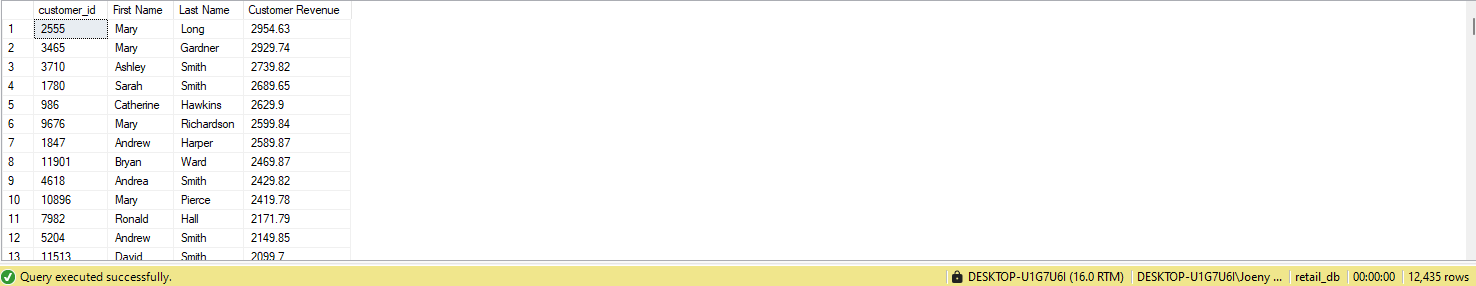

### Exercise 4 - Revenue Per Category

Get the revenue generated for each category for the month of 2014 January
* Tables - orders, order_items, products and categories
* Data should be sorted in ascending order by category_id.
* Output should contain all the fields from category along with the revenue as category_revenue.
* Consider only COMPLETE and CLOSED orders

<br />

Code:
```sql
SELECT
	c.*,
	COALESCE(SUM(product_category_rev.order_item_subtotal), 0) AS category_revenue
FROM
	categories c
LEFT JOIN
	(
	SELECT
		p.product_category_id,
		oi.order_item_subtotal
	FROM
		products p
	JOIN
		order_items oi ON oi.order_item_product_id = p.product_id
	JOIN
		orders o ON o.order_id = oi.order_item_order_id
	WHERE
		format(o.order_date, 'yyyy-MM') = '2014-01'
		AND (o.order_status LIKE '%COMPLETE%' OR o.order_status LIKE '%CLOSED%')
	) AS product_category_rev ON product_category_rev.product_category_id = c.category_id
GROUP BY
	c.category_id,
	c.category_department_id,
	c.category_name
ORDER BY
    c.category_id;
```
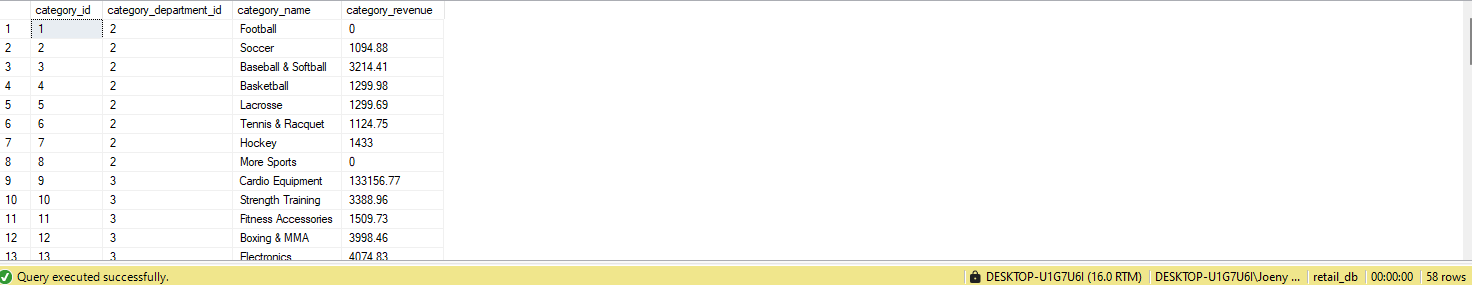

### Exercise 5 - Product Count Per Department

Get the products for each department.
* Tables - departments, categories, products
* Data should be sorted in ascending order by department_id
* Output should contain all the fields from department and the product count as product_count

<br />

Code:
```sql
SELECT
	d.*,
	COUNT(p.product_id) AS product_count
FROM
	departments d
LEFT JOIN
	categories c ON c.category_department_id = d.department_id
LEFT JOIN
	products p ON p.product_category_id = c.category_id
GROUP BY
	d.department_id,
	d.department_name
ORDER BY
	d.department_id;
```
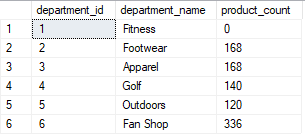